In [2]:
!date +%F

2024-11-14


### This script is to visualize the global correlation within the same screen. 

In [3]:
#!/usr/bin/env python3
import os
import re
import sys
import collections
import argparse
import tables
import glob
import itertools
import math

import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.sparse as sp_sparse

import matplotlib.gridspec as gridspec
from multiprocessing import Pool
from collections import defaultdict
from scipy import sparse, io
from scipy.sparse import csr_matrix
from multiprocessing import Pool
import matplotlib.pyplot as plt
import gseapy as gp

In [4]:
annot_dict_file = '/project/GCRB/Hon_lab/s426305/Analysis/IGVF/20231027_CMPilot2_lenti_cleancell/pySpade/perturbation_region_annot.txt'
annot_dict = {}
with open(annot_dict_file) as f:
    for line in f:
        region_id, annotation = line.strip().split("\t")
        annot_dict.update({region_id : annotation})

### H9 lenti

In [5]:
express_df = pd.read_csv('/project/GCRB/Hon_lab/s426305/Analysis/IGVF/20240723_H9_lenti_CMPilot2_reprocess/pySpade/Manhattan_plots/filtered_df.csv')

In [6]:
correlation_df = pd.DataFrame(data=None, columns=list(set(express_df['region'])), index=list(set(express_df['region'])))

for i in correlation_df.index:
    express_subset_df = express_df[express_df['region'] == i]
    up_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] > 1]['idx'].values
    down_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] < 1]['idx'].values
    plot_y_val = [0] * (np.max(express_df['idx'])+1)
    for u in up_idx:
        plot_y_val[u] = -express_subset_df[express_subset_df['idx'] == u]['log(pval)-hypergeom'].values[0]
    for d in down_idx:
        plot_y_val[d] = express_subset_df[express_subset_df['idx'] == d]['log(pval)-hypergeom'].values[0]
        
    for j in correlation_df.columns:
        express_subset_df_j = express_df[express_df['region'] == j]
        up_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] > 1]['idx'].values
        down_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] < 1]['idx'].values
        plot_y_val_j = [0] * (np.max(express_df['idx'])+1)
        for u in up_idx:
            plot_y_val_j[u] = -express_subset_df_j[express_subset_df_j['idx'] == u]['log(pval)-hypergeom'].values[0]
        for d in down_idx:
            plot_y_val_j[d] = express_subset_df_j[express_subset_df_j['idx'] == d]['log(pval)-hypergeom'].values[0]

        covariance = np.corrcoef(plot_y_val, plot_y_val_j)[0,1]
        correlation_df.loc[i, j] = covariance

#### Rename the correlation df with annotation

In [7]:
annot_correlation_df = correlation_df.rename(columns=annot_dict, index=annot_dict)

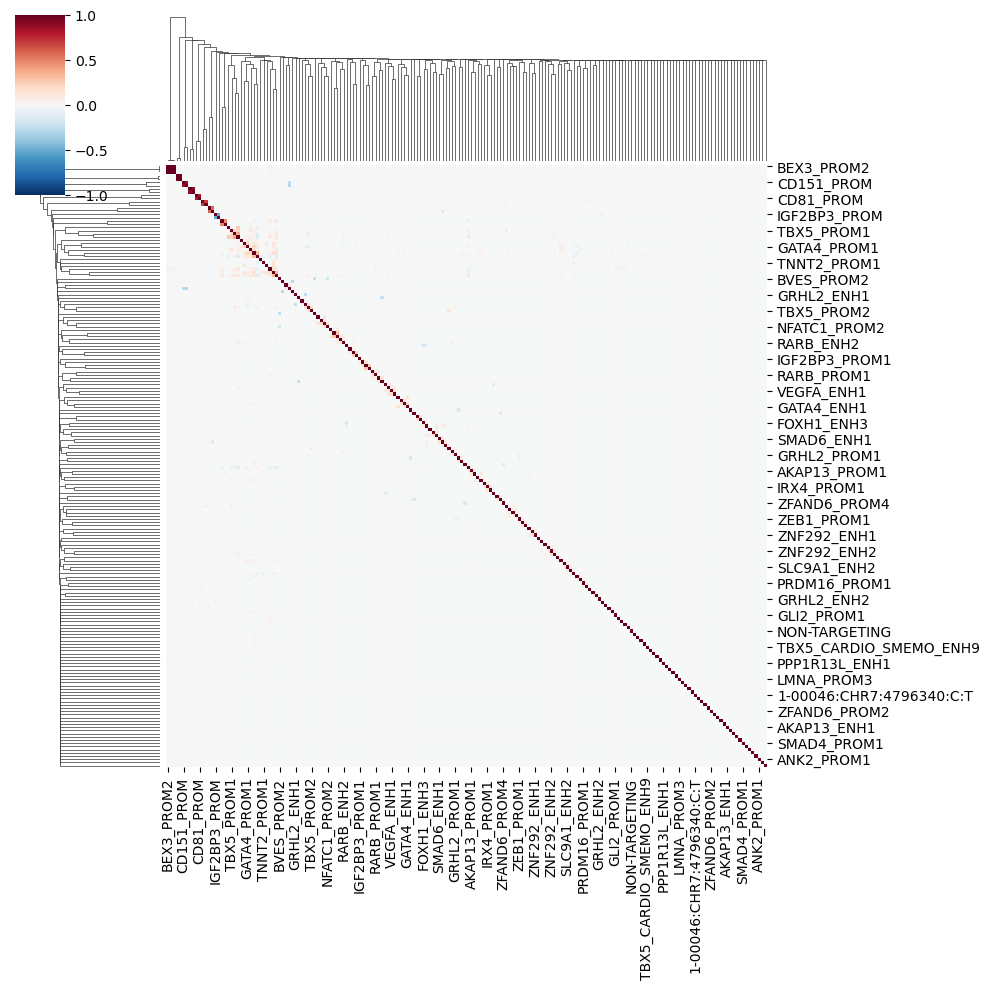

In [8]:
import seaborn as sns
g = sns.clustermap(annot_correlation_df.astype(float), cmap='RdBu_r', vmin=-1, vmax=1)

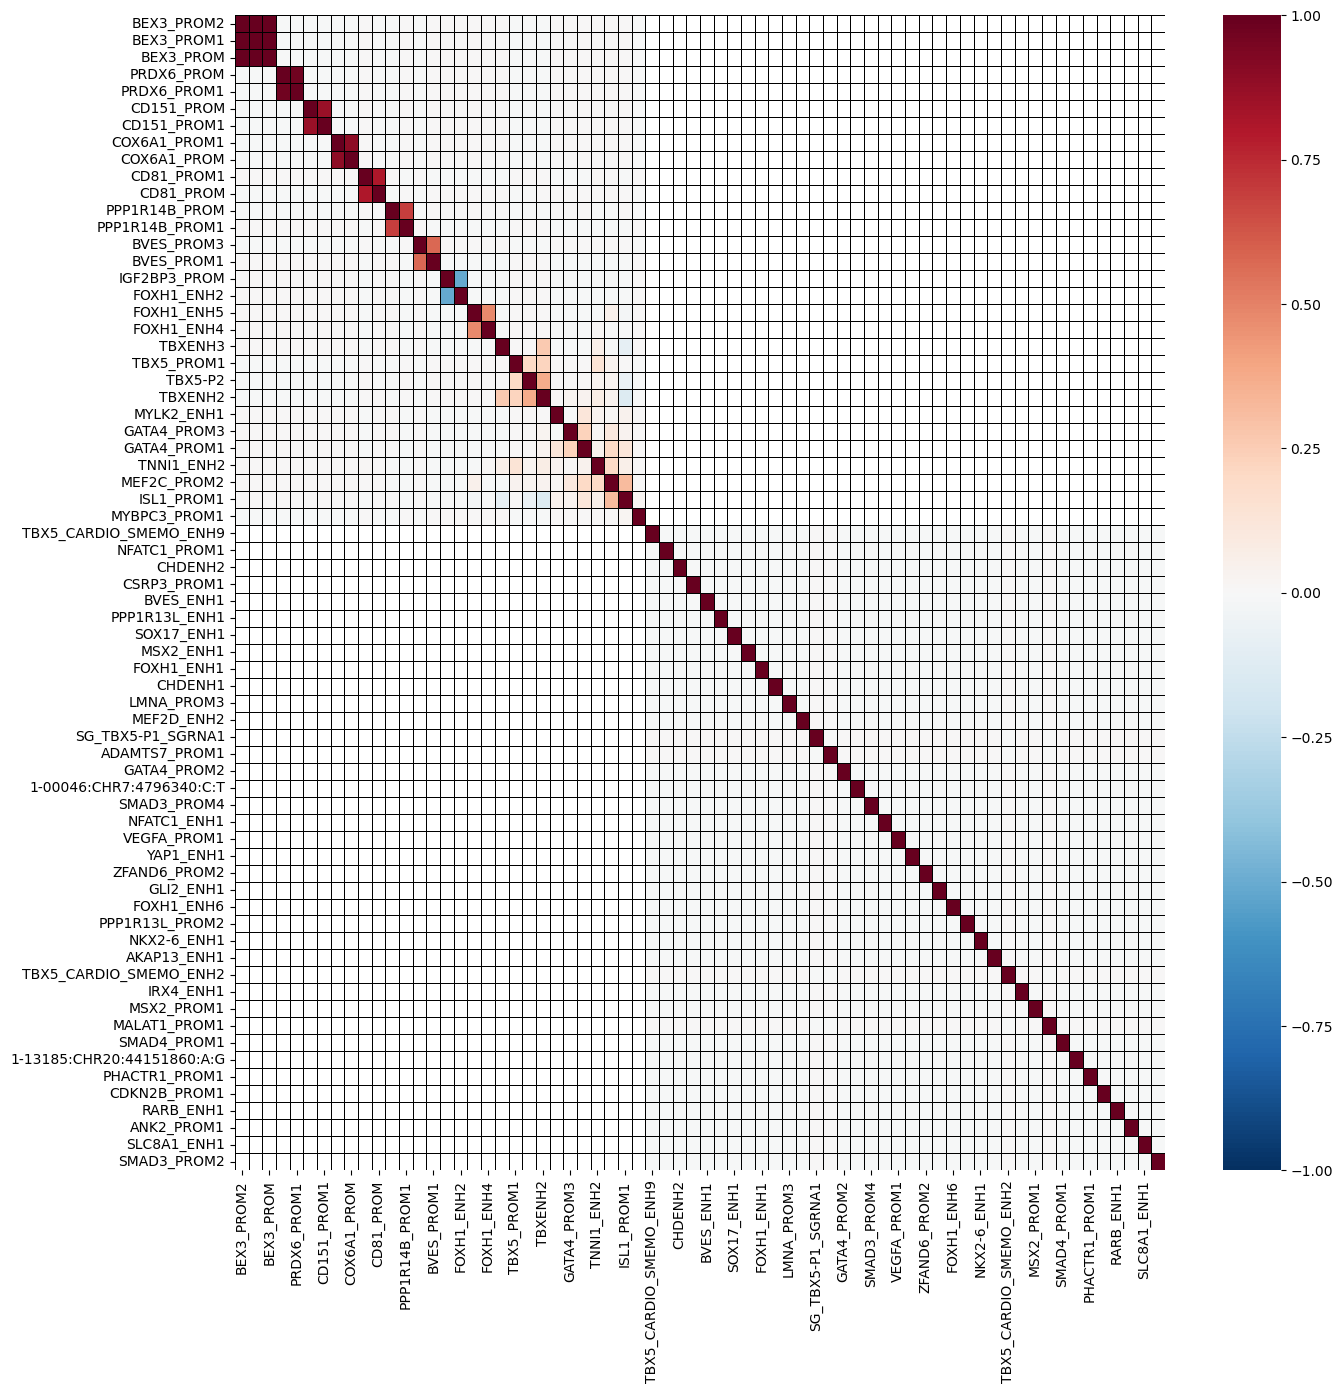

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_df = pd.concat([annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[:30, :30].astype(float), 
            annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[150:189, 150:189].astype(float)])
sns.heatmap(plot_df, 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
plt.show()
#plt.savefig('./H9_lenti_global_correlation_heatmap.pdf')

### H9 PB9

In [10]:
express_df = pd.read_csv('/project/GCRB/Hon_lab/s426305/Analysis/IGVF/20240605_H9_CMPilot2_PB9/pySpade/Manhattan_plots/filtered_df.csv')

In [11]:
correlation_df = pd.DataFrame(data=None, columns=list(set(express_df['region'])), index=list(set(express_df['region'])))

for i in correlation_df.index:
    express_subset_df = express_df[express_df['region'] == i]
    up_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] > 1]['idx'].values
    down_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] < 1]['idx'].values
    plot_y_val = [0] * (np.max(express_df['idx'])+1)
    for u in up_idx:
        plot_y_val[u] = -express_subset_df[express_subset_df['idx'] == u]['log(pval)-hypergeom'].values[0]
    for d in down_idx:
        plot_y_val[d] = express_subset_df[express_subset_df['idx'] == d]['log(pval)-hypergeom'].values[0]
        
    for j in correlation_df.columns:
        express_subset_df_j = express_df[express_df['region'] == j]
        up_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] > 1]['idx'].values
        down_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] < 1]['idx'].values
        plot_y_val_j = [0] * (np.max(express_df['idx'])+1)
        for u in up_idx:
            plot_y_val_j[u] = -express_subset_df_j[express_subset_df_j['idx'] == u]['log(pval)-hypergeom'].values[0]
        for d in down_idx:
            plot_y_val_j[d] = express_subset_df_j[express_subset_df_j['idx'] == d]['log(pval)-hypergeom'].values[0]

        covariance = np.corrcoef(plot_y_val, plot_y_val_j)[0,1]
        correlation_df.loc[i, j] = covariance

#### Rename the correlation df with annotation

In [12]:
annot_correlation_df = correlation_df.rename(columns=annot_dict, index=annot_dict)

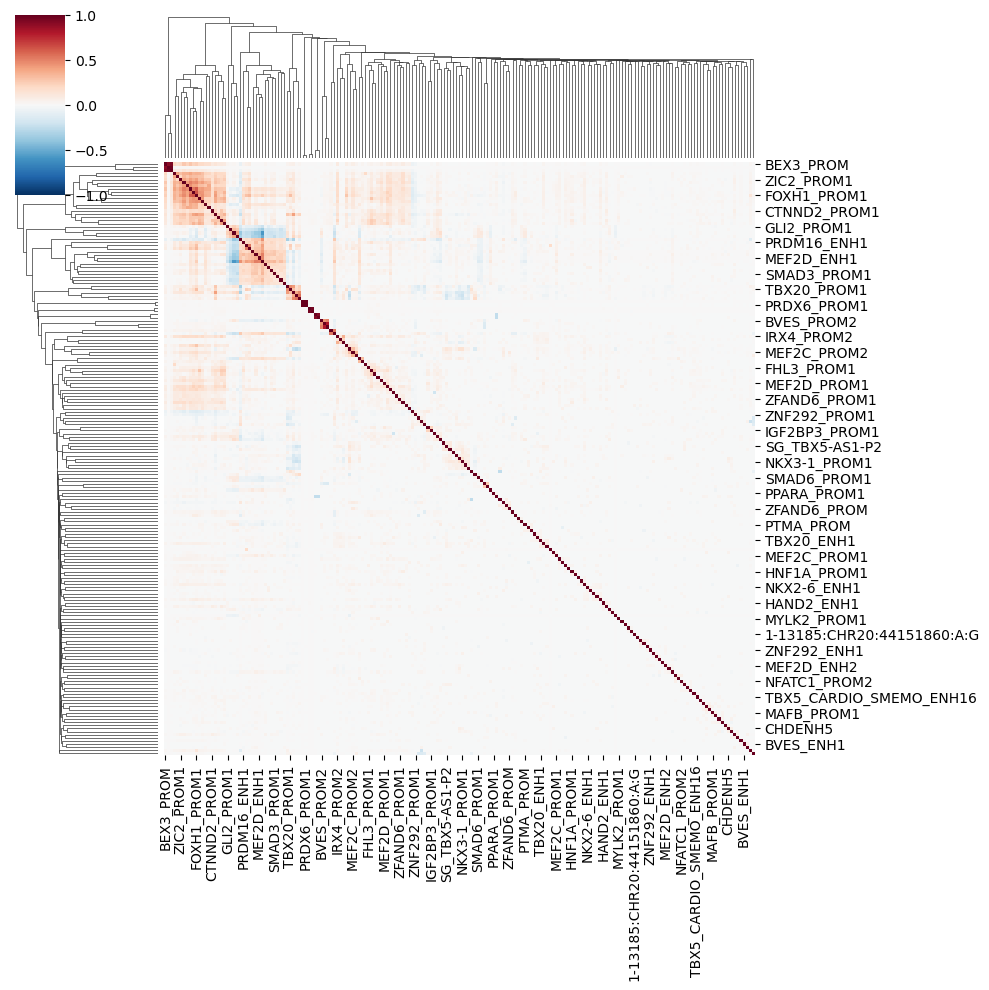

In [13]:
import seaborn as sns
g = sns.clustermap(annot_correlation_df.astype(float), cmap='RdBu_r', vmin=-1, vmax=1)

In [14]:
plot_list = ['GRHL2_PROM1', 'GRHL2_ENH1', 'SOX17_PROM1', 'NKX2-5_PROM1', 'TBX20_PROM1', 'TBX5_PROM1', 'TBXENH2', 'TBXENH3', 'TBX5-P2']

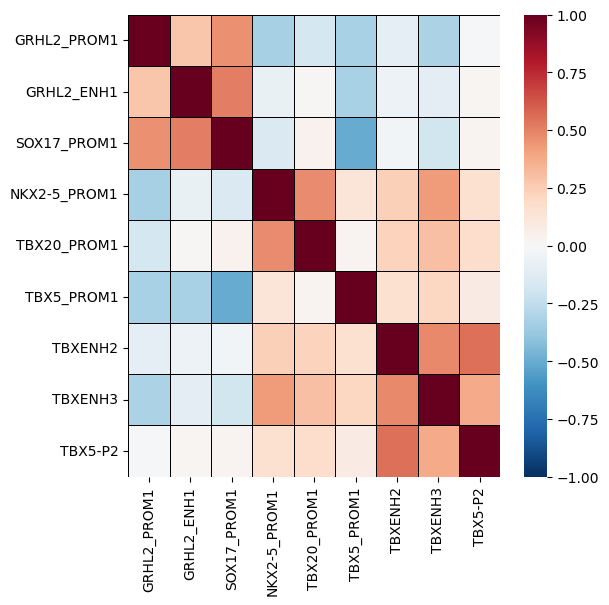

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(annot_correlation_df.loc[plot_list, plot_list].astype(float), 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
plt.savefig('H9_PB9_global_correlation_heatmap_zoomin_20241114.pdf')
#plt.show()

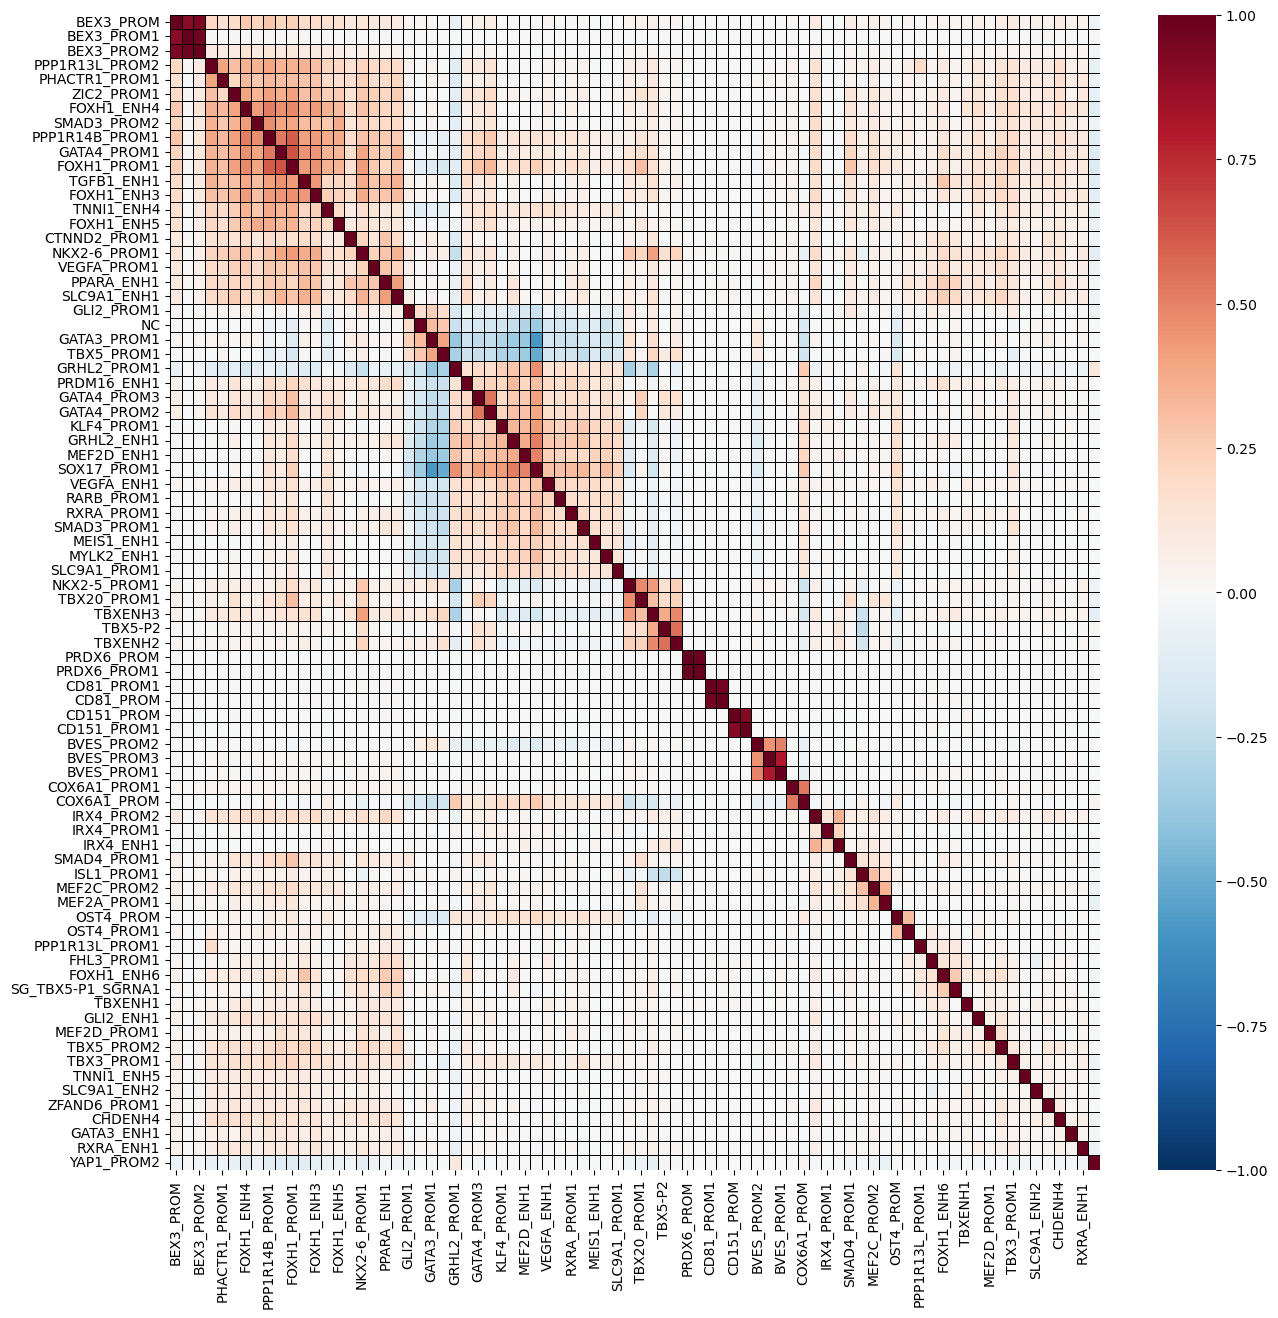

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[:80, :80].astype(float), 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
#plt.savefig('./H9_PB9_global_correlation_heatmap.pdf')
plt.show()

## H9 inducible 

In [18]:
express_df = pd.read_csv('/project/GCRB/Hon_lab/s426305/Analysis/IGVF/20240605_H9_CMPilot2_inducible/pySpade/Manhattan_plots/filtered_df.csv')

In [19]:
correlation_df = pd.DataFrame(data=None, columns=list(set(express_df['region'])), index=list(set(express_df['region'])))

for i in correlation_df.index:
    express_subset_df = express_df[express_df['region'] == i]
    up_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] > 1]['idx'].values
    down_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] < 1]['idx'].values
    plot_y_val = [0] * (np.max(express_df['idx'])+1)
    for u in up_idx:
        plot_y_val[u] = -express_subset_df[express_subset_df['idx'] == u]['log(pval)-hypergeom'].values[0]
    for d in down_idx:
        plot_y_val[d] = express_subset_df[express_subset_df['idx'] == d]['log(pval)-hypergeom'].values[0]
        
    for j in correlation_df.columns:
        express_subset_df_j = express_df[express_df['region'] == j]
        up_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] > 1]['idx'].values
        down_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] < 1]['idx'].values
        plot_y_val_j = [0] * (np.max(express_df['idx'])+1)
        for u in up_idx:
            plot_y_val_j[u] = -express_subset_df_j[express_subset_df_j['idx'] == u]['log(pval)-hypergeom'].values[0]
        for d in down_idx:
            plot_y_val_j[d] = express_subset_df_j[express_subset_df_j['idx'] == d]['log(pval)-hypergeom'].values[0]

        covariance = np.corrcoef(plot_y_val, plot_y_val_j)[0,1]
        correlation_df.loc[i, j] = covariance

#### Rename the correlation df with annotation

In [20]:
annot_correlation_df = correlation_df.rename(columns=annot_dict, index=annot_dict)

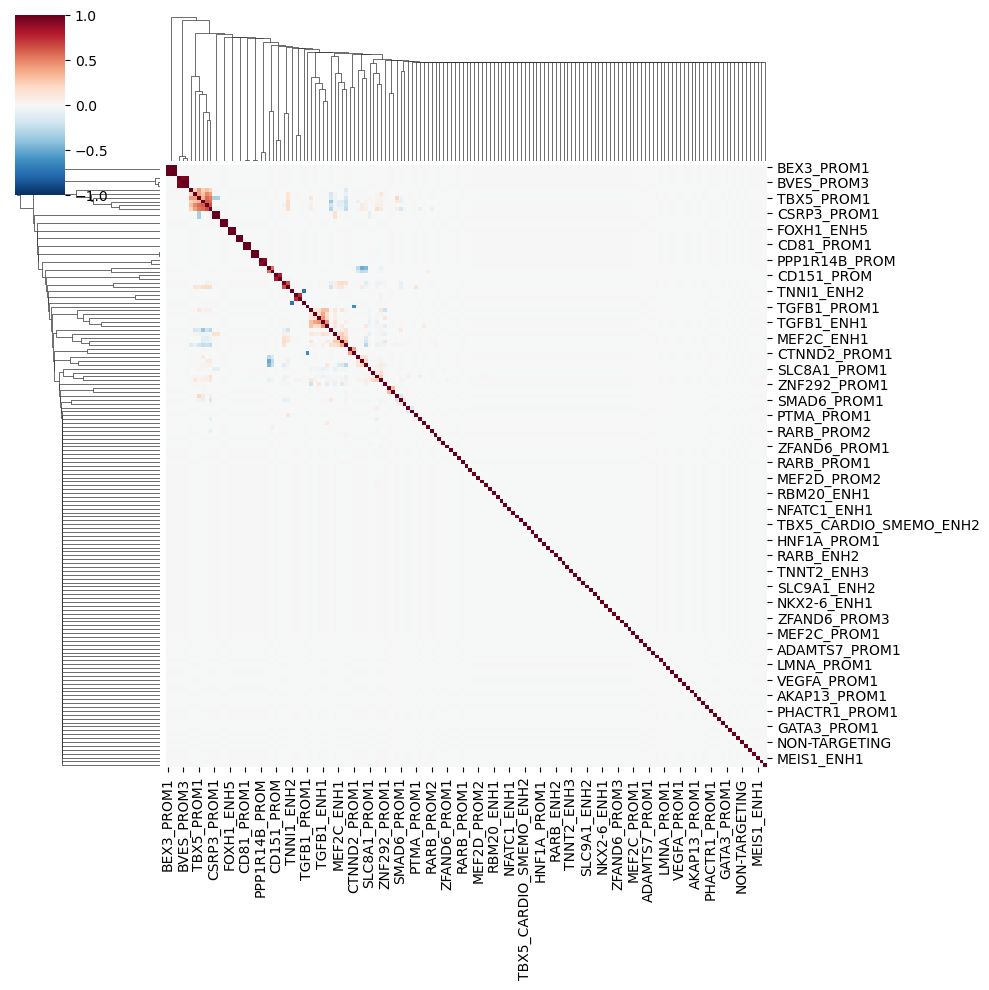

In [21]:
import seaborn as sns
g = sns.clustermap(annot_correlation_df.astype(float), cmap='RdBu_r', vmin=-1, vmax=1)

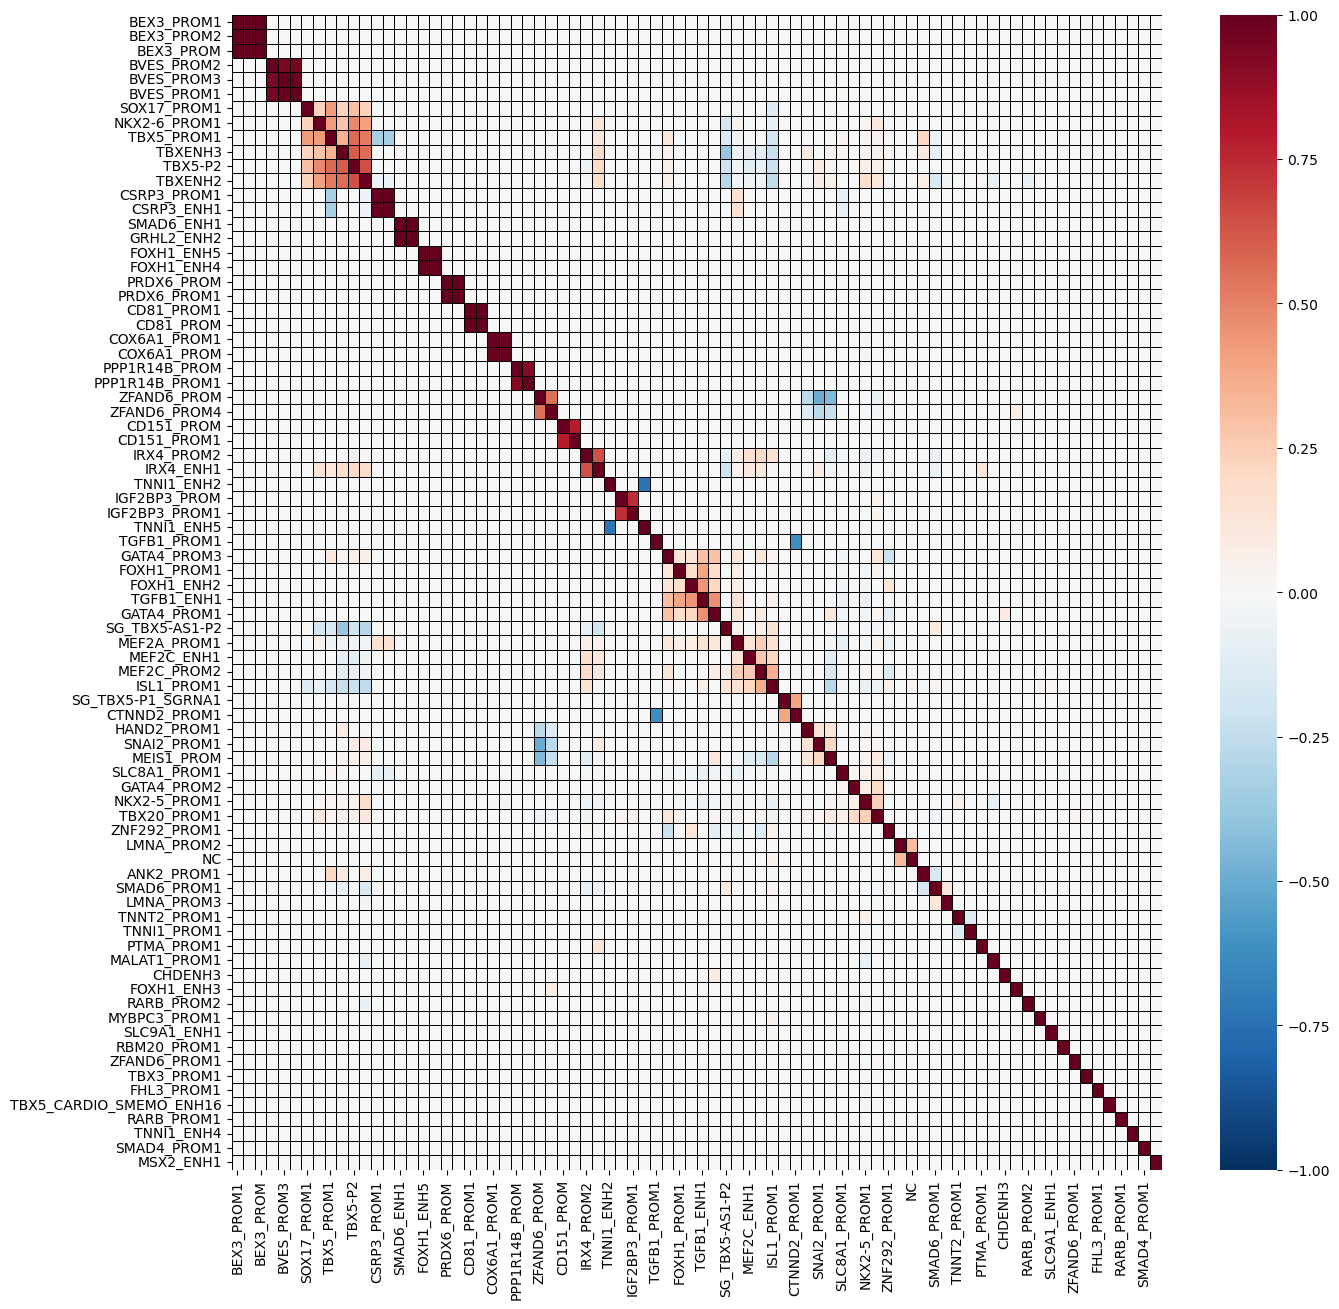

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[:80, :80].astype(float), 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
#plt.savefig('./H9_inducible_global_correlation_heatmap.pdf')
plt.show()

## WTC11 PB9

In [23]:
express_df = pd.read_csv('/project/GCRB/Hon_lab/s426305/Analysis/IGVF/20240605_WTC11_CMPilot2_PB9/pySpade/Manhattan_plots/filtered_df.csv')

In [24]:
correlation_df = pd.DataFrame(data=None, columns=list(set(express_df['region'])), index=list(set(express_df['region'])))

for i in correlation_df.index:
    express_subset_df = express_df[express_df['region'] == i]
    up_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] > 1]['idx'].values
    down_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] < 1]['idx'].values
    plot_y_val = [0] * (np.max(express_df['idx'])+1)
    for u in up_idx:
        plot_y_val[u] = -express_subset_df[express_subset_df['idx'] == u]['log(pval)-hypergeom'].values[0]
    for d in down_idx:
        plot_y_val[d] = express_subset_df[express_subset_df['idx'] == d]['log(pval)-hypergeom'].values[0]
        
    for j in correlation_df.columns:
        express_subset_df_j = express_df[express_df['region'] == j]
        up_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] > 1]['idx'].values
        down_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] < 1]['idx'].values
        plot_y_val_j = [0] * (np.max(express_df['idx'])+1)
        for u in up_idx:
            plot_y_val_j[u] = -express_subset_df_j[express_subset_df_j['idx'] == u]['log(pval)-hypergeom'].values[0]
        for d in down_idx:
            plot_y_val_j[d] = express_subset_df_j[express_subset_df_j['idx'] == d]['log(pval)-hypergeom'].values[0]

        covariance = np.corrcoef(plot_y_val, plot_y_val_j)[0,1]
        correlation_df.loc[i, j] = covariance

#### Rename the correlation df with annotation

In [25]:
annot_correlation_df = correlation_df.rename(columns=annot_dict, index=annot_dict)

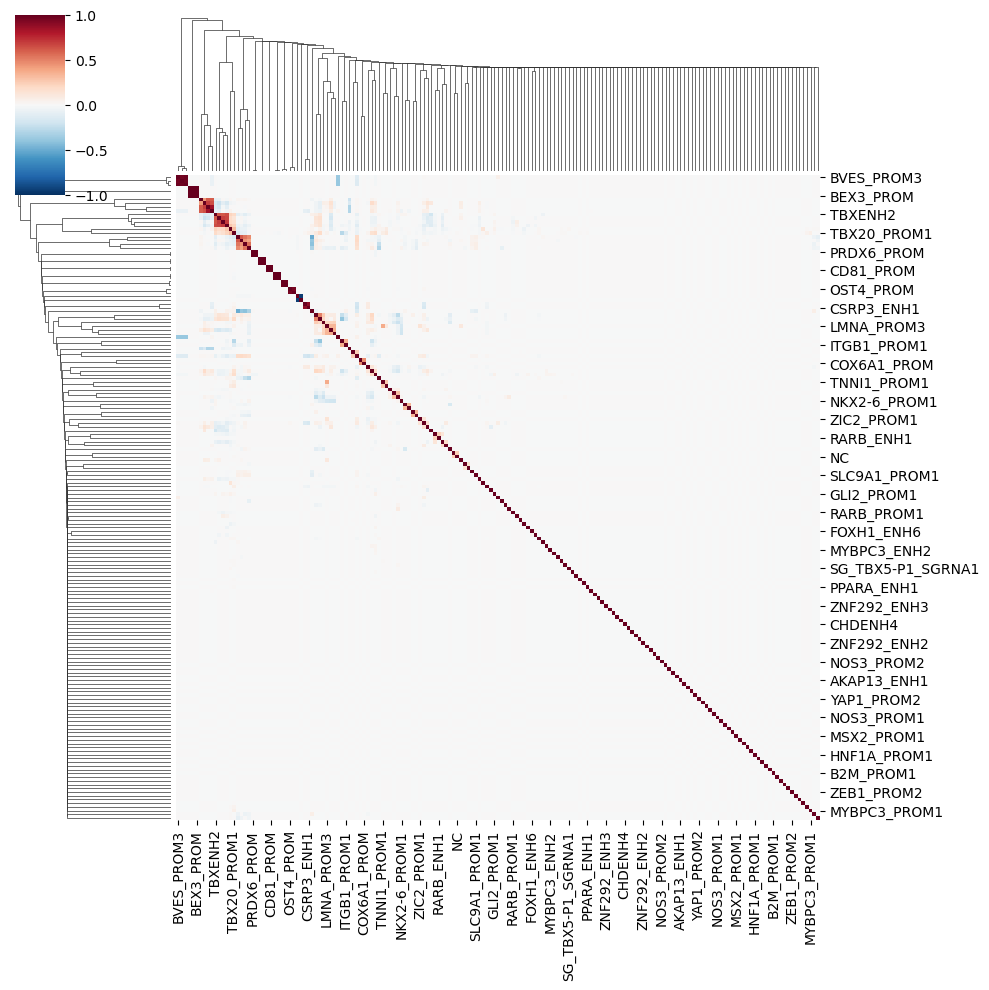

In [26]:
import seaborn as sns
g = sns.clustermap(annot_correlation_df.astype(float), cmap='RdBu_r', vmin=-1, vmax=1)

In [27]:
plot_list = ['GRHL2_PROM1', 'GRHL2_ENH1', 'SOX17_PROM1', 'NKX2-5_PROM1', 'TBX20_PROM1', 'TBX5_PROM1', 'TBXENH2', 'TBXENH3', 'TBX5-P2']

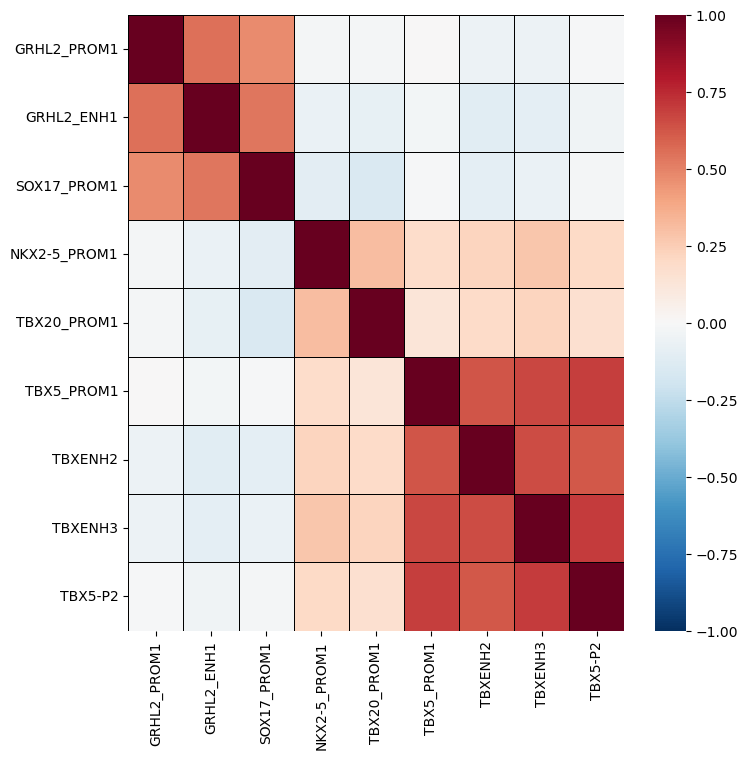

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(annot_correlation_df.loc[plot_list, plot_list].astype(float), 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
plt.savefig('./WTC11_PB9_global_correlation_heatmap_zoomin_20241114.pdf')
#plt.show()

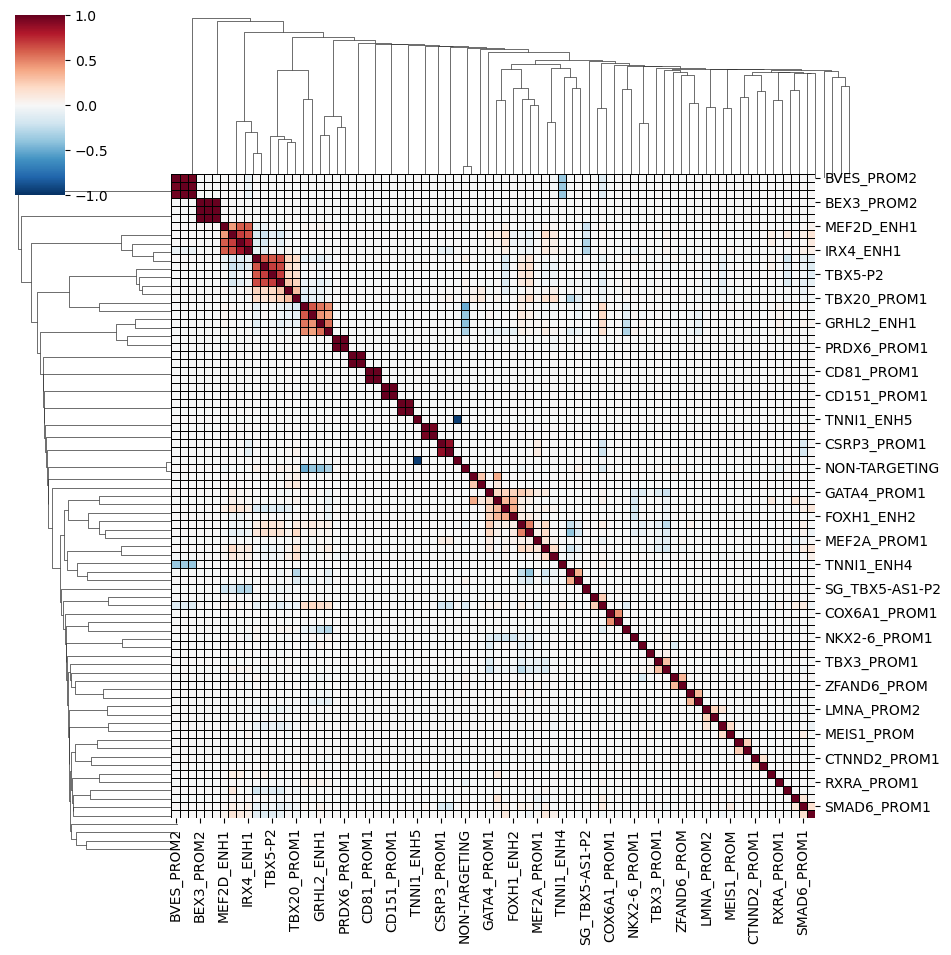

In [29]:
g_zoom = sns.clustermap(annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[:80, :80].astype(float), 
            cmap='RdBu_r', vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
g_zoom.ax_row_dendrogram = g.ax_row_dendrogram
g_zoom.ax_col_dendrogram = g.ax_col_dendrogram
bbox = g.ax_heatmap.get_position()
g_zoom.ax_heatmap.set_position([bbox.x0-0.005, bbox.y0+0.002, bbox.width , bbox.height])
g_zoom.ax_row_dendrogram.set_position([bbox.x0 , bbox.y0, bbox.width , bbox.height])
g_zoom.ax_col_dendrogram.set_position([bbox.x0 , bbox.y0, bbox.width , bbox.height])

#plt.savefig('./WTC11_PB9_global_correlation_heatmap_dendrogram.pdf')
plt.show()

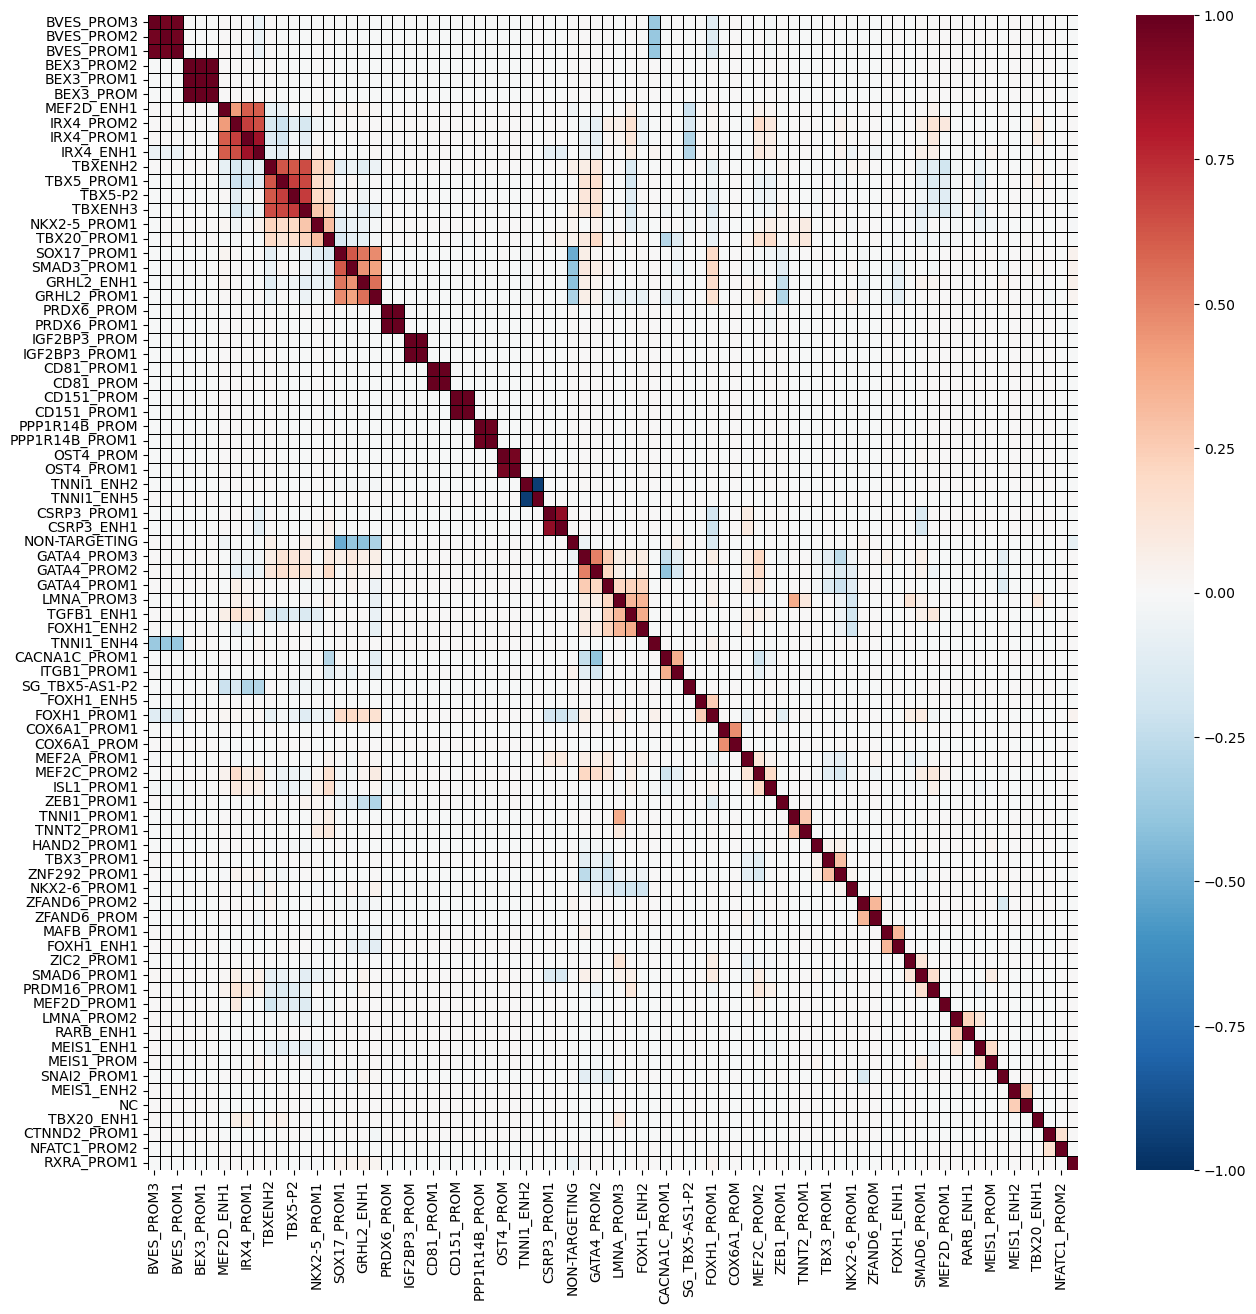

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[:80, :80].astype(float), 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
#plt.savefig('./WTC11_PB9_global_correlation_heatmap.pdf')
plt.show()

## WTC11 recombinase

In [31]:
express_df = pd.read_csv('/project/GCRB/Hon_lab/s426305/Analysis/IGVF/20240605_WTC11_CMPilot2_recombinase/pySpade/Manhattan_plots/filtered_df.csv')

In [32]:
correlation_df = pd.DataFrame(data=None, columns=list(set(express_df['region'])), index=list(set(express_df['region'])))

for i in correlation_df.index:
    express_subset_df = express_df[express_df['region'] == i]
    up_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] > 1]['idx'].values
    down_idx = express_subset_df[express_subset_df['fc_by_rand_dist_cpm'] < 1]['idx'].values
    plot_y_val = [0] * (np.max(express_df['idx'])+1)
    for u in up_idx:
        plot_y_val[u] = -express_subset_df[express_subset_df['idx'] == u]['log(pval)-hypergeom'].values[0]
    for d in down_idx:
        plot_y_val[d] = express_subset_df[express_subset_df['idx'] == d]['log(pval)-hypergeom'].values[0]
        
    for j in correlation_df.columns:
        express_subset_df_j = express_df[express_df['region'] == j]
        up_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] > 1]['idx'].values
        down_idx = express_subset_df_j[express_subset_df_j['fc_by_rand_dist_cpm'] < 1]['idx'].values
        plot_y_val_j = [0] * (np.max(express_df['idx'])+1)
        for u in up_idx:
            plot_y_val_j[u] = -express_subset_df_j[express_subset_df_j['idx'] == u]['log(pval)-hypergeom'].values[0]
        for d in down_idx:
            plot_y_val_j[d] = express_subset_df_j[express_subset_df_j['idx'] == d]['log(pval)-hypergeom'].values[0]

        covariance = np.corrcoef(plot_y_val, plot_y_val_j)[0,1]
        correlation_df.loc[i, j] = covariance

#### Rename the correlation df with annotation

In [33]:
annot_correlation_df = correlation_df.rename(columns=annot_dict, index=annot_dict)

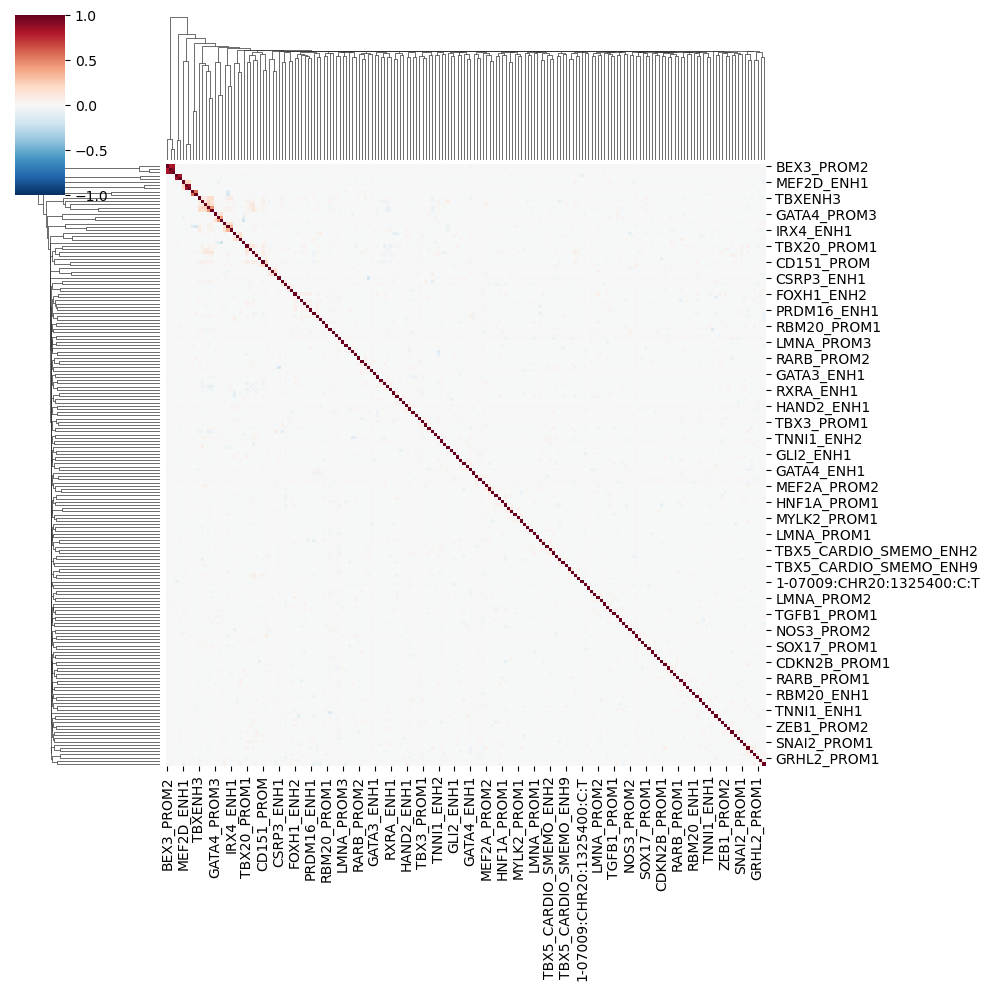

In [34]:
import seaborn as sns
g = sns.clustermap(annot_correlation_df.astype(float), cmap='RdBu_r', vmin=-1, vmax=1)

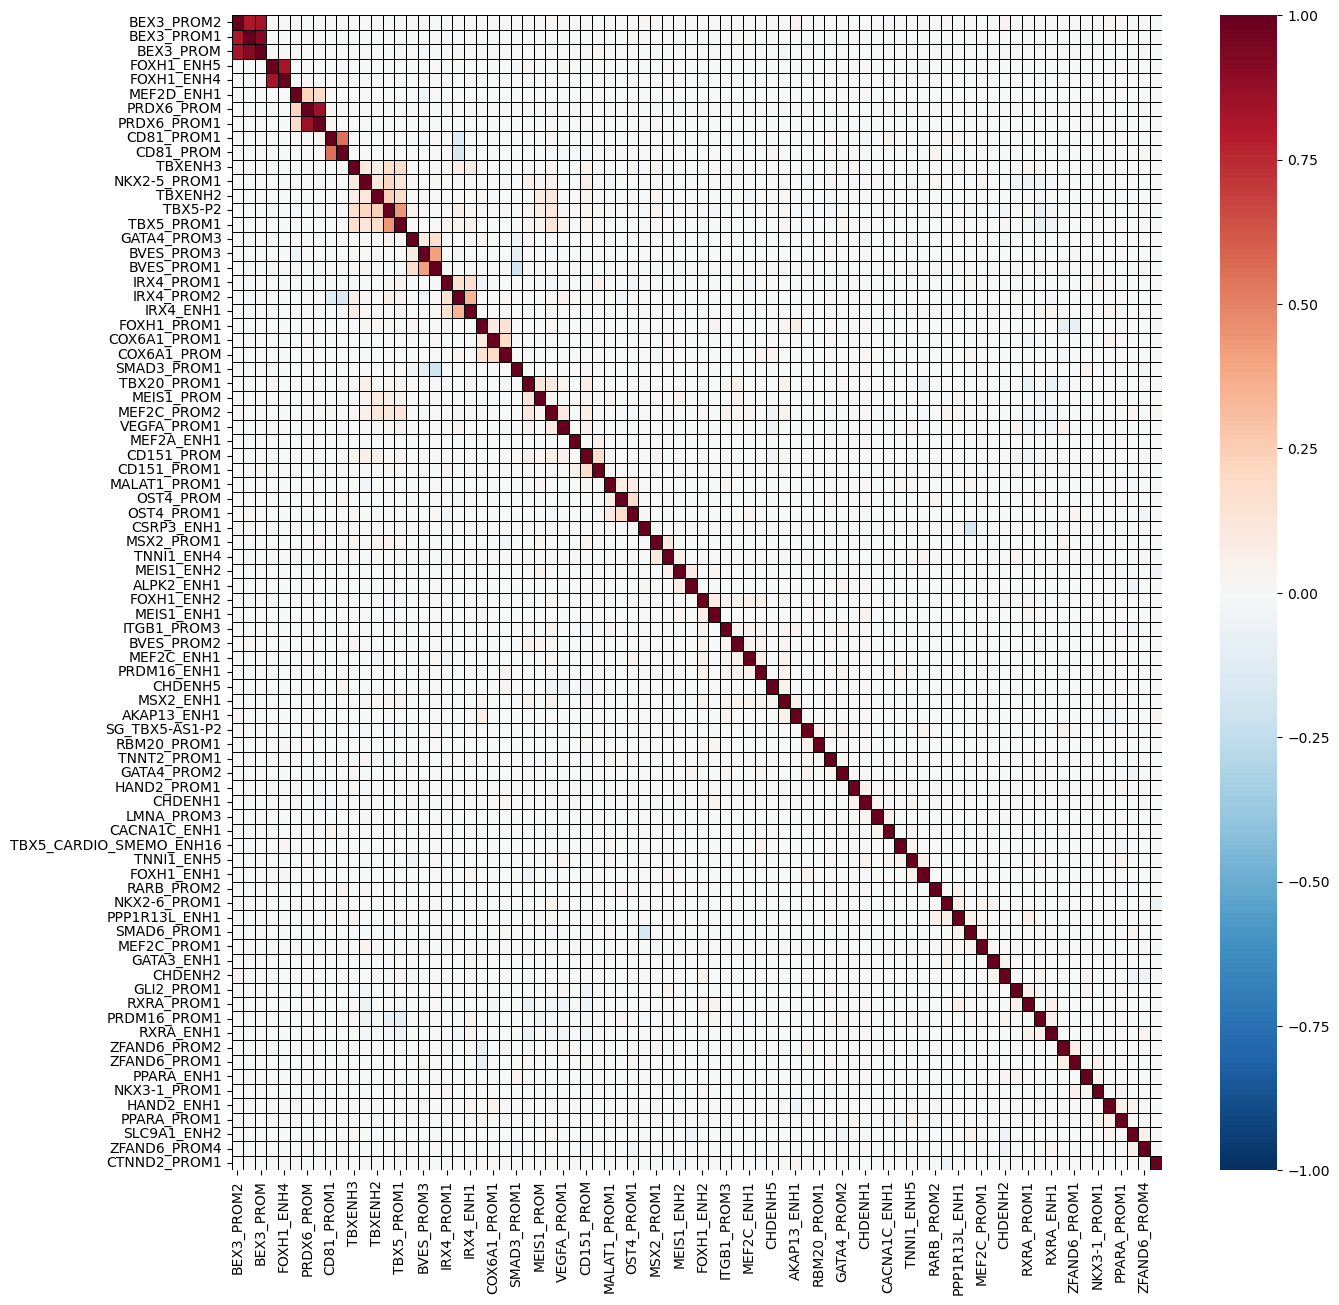

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(annot_correlation_df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_row.reordered_ind].iloc[:80, :80].astype(float), 
            cmap='RdBu_r', ax=ax, vmax=1, vmin=-1, rasterized=True, linewidths=0.5, linecolor='black')
#plt.savefig('./WTC11_recombinase_global_correlation_heatmap.pdf')
plt.show()